<a href="https://colab.research.google.com/github/ditiansm2015/MoR_TTGB/blob/main/TT_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Loading Dataset from local drive

from google.colab import files
uploaded = files.upload()

Saving TT_train.csv to TT_train.csv


In [ ]:
# Creating a dataframe from dataset

column_names = ["Object_Name", "Emp_Name", "Description_EN", "Category", "Company_Code", "Process_Area" ]
df =pd.read_csv('TT_train.csv', header=1, names=column_names) # header = 1 to specify that first row is column name in the csv file. (Basically to not count first row as a data element)
df.head()

,Object_Name,Emp_Name,Description_EN,Category,Company_Code,Process_Area
0,TT/SBE,"Vrieling , Gerd",Sales Belgium,D,04A0,SD
1,TT/SBE-MKT,"Köhler , Leandra",Marketing,D,04A0,MK
2,TT/SBE-SOP,"Köhler , Leandra",Internal Sales,D,04A0,SD
3,TT/SBE-SOP1,"Van den Bulck , Karolien",Sales Operations,G,04A0,SD
4,TT/SBE-SOP11,"Talla , Hassan",Counter Desk Mechelen,G,04A0,SD


In [ ]:
# Merging feature Object_Name and its desciption and forming a new feature Object

df["Object"] = df["Object_Name"] + " " + df['Description_EN']
df.head()

,Object_Name,Emp_Name,Description_EN,Category,Company_Code,Process_Area,Object
0,TT/SBE,"Vrieling , Gerd",Sales Belgium,D,04A0,SD,TT/SBE Sales Belgium
1,TT/SBE-MKT,"Köhler , Leandra",Marketing,D,04A0,MK,TT/SBE-MKT Marketing
2,TT/SBE-SOP,"Köhler , Leandra",Internal Sales,D,04A0,SD,TT/SBE-SOP Internal Sales
3,TT/SBE-SOP1,"Van den Bulck , Karolien",Sales Operations,G,04A0,SD,TT/SBE-SOP1 Sales Operations
4,TT/SBE-SOP11,"Talla , Hassan",Counter Desk Mechelen,G,04A0,SD,TT/SBE-SOP11 Counter Desk Mechelen


In [ ]:
X = df.drop(["Object_Name", 'Emp_Name', 'Description_EN','Category','Company_Code','Process_Area'], axis = 1)
y = df["Process_Area"]

In [ ]:
print("Shape of Object Feature before Oversampling", X.shape)
print("Shape of Process Area Feature before Oversampling", y.shape)

Shape of Object Feature before Oversampling (446, 1)
Shape of Process Area Feature before Oversampling (446,)


In [ ]:
# Checking for null values in X and y 
print("Null values in Object Feature: ",X.isnull().sum())
print("Null values in Process Area Feature: ",y.isnull().sum())

Null values in Object Feature:  Object    0
dtype: int64
Null values in Process Area Feature:  0


In [ ]:
# Checking for NaN values in X and y
print("NaN values in Object : ", X.isna().sum())
print("NaN values in Process Area : ", y.isna().sum())

NaN values in Object :  Object    0
dtype: int64
NaN values in Process Area :  0


In [ ]:
# Frequency of each Process Area before Over Sampling
count = y.value_counts()
print("Frequency of each Process Area in the dataset before oversampling:\n ",count)


Frequency of each Process Area in the dataset before oversampling:
  SD     96
MF     60
EG     40
LE     34
PU     27
AS     25
E      24
PM     22
MK     19
CO     18
QM     16
CS     15
FC     10
HS      8
HR      8
FI      6
VS      5
SC      4
DO      4
PS      2
TF      1
ASA     1
MKT     1
Name: Process_Area, dtype: int64


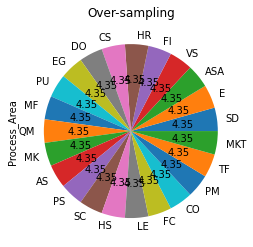

In [ ]:
# Performing Over Sampling to avoid class imbalance

from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X, y = ros.fit_resample(X, y)

ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
# Frequency of each Process Area in the dataset after OverSampling
count = y.value_counts()
print("Frequency of each Process Area in the dataset after Over Sampling:\n ",count)

Frequency of each Process Area in the dataset after Over Sampling:
  SD     96
E      96
ASA    96
VS     96
FI     96
HR     96
CS     96
DO     96
EG     96
PU     96
MF     96
QM     96
MK     96
AS     96
PS     96
SC     96
HS     96
LE     96
FC     96
CO     96
PM     96
TF     96
MKT    96
Name: Process_Area, dtype: int64


**Forming Word Cloud**

Text(0.5, 1.0, 'Word Cloud for Objects')

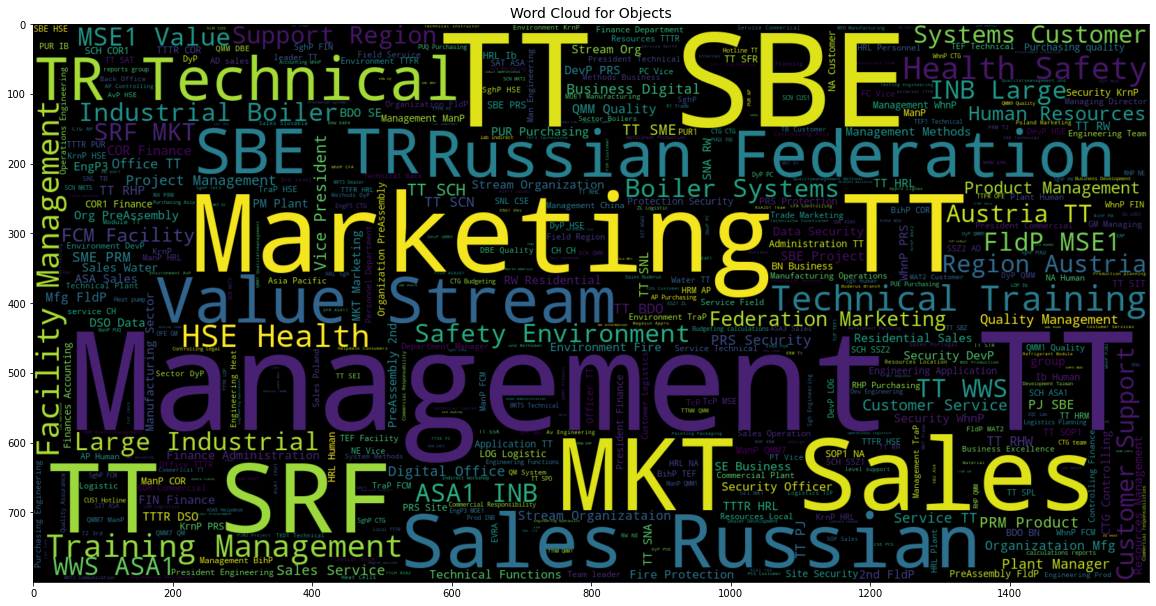

In [ ]:
# Word Cloud for Object Attribute
# Larger the word in word cloud, more is it occurance in the document

from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X.Object))
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word Cloud for Objects", fontsize = 14)


**Elimitating inverted commas from the sentences**

In [ ]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

### **Applying NLP Techniques**

**Eliminating Stop Words**

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

**Performing Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
# Cleaning Object - Replacing non alphabets with space, converting letters into lowercase, removing stop words, lemmatizing the tokens

def object_cleaning(raw_obj):
  # 1. Replace all non alphabets with a space
  letters_only = re.sub('[^a-zA-z]',' ',raw_obj)
  
  # 2. Convert the sentence into lower letters
  words = letters_only.lower().split()

  # 3. Remove stop words from the tokens
  meaningful_words = [w for w in words if not w in stop]

  # 4. Lemmatize the tokens
  lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

  # 5. Join words
  return(' '.join(lemmatized_words))


In [ ]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Cleaning the values present in newly created feature - "Object"  using above created function (object_cleaning)
import re

X['object_cleaned'] = X['Object'].apply(object_cleaning)


NameError: ignored

In [ ]:
X.head()

**Creating Train and Target variables**

In [ ]:
X_feat = X['object_cleaned']

# y was already defined earlier during oversampling

In [ ]:
# Splitting dataset into training and test set in the ratio 80:20

X_train, X_test, Y_train, Y_test = train_test_split(X_feat, y , stratify = y, test_size = 0.2, random_state = 0)

**Bag of Words**

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

Bag of Words + Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb = MultinomialNB()
mnb.fit(count_train, Y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)

#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

Bag of Words + Passive Aggresive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

passive = PassiveAggressiveClassifier()
passive.fit(count_train, Y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)


TF-IDF + Multinomial Naive Bayes

In [ ]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, Y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


TF-IDF + Passive Aggresive Classifier

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, Y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

In [ ]:
text =["Marketing"]
test = tfidf_vectorizer.transform(text)
pred = pass_tf.predict(test)[0]
pred

**Prediction on Test set**

In [ ]:
df2 =pd.read_csv('TT_test.csv') # header = 1 to specify that first row is column name in the csv file. (Basically to not count first row as a data element)
df2.head()

In [ ]:
df2.shape

In [ ]:
df2.isnull().sum()

In [ ]:
df2["Object_new"] = df2['Object name'] + " " + df2['Description EN']
train2 = df2.drop(["Object name", 'Emp Name', 'Description EN', 'Category - Org type','Company Code'],axis =1)
train2.head()

In [ ]:
import re

df2['object_cleaned'] = df2['Object_new'].apply(object_cleaning)

In [ ]:
X_new = df2['object_cleaned']
X_new

In [ ]:
# Iterating through all the Objects and predicting Process Area for each Object

for text in df2['object_cleaned']:
 text = [text]
 test = tfidf_vectorizer.transform(text)
 pred1=pass_tf.predict(test)[0]
 print(pred1)

**Creating Final Prediction for recording predictions on Test Data**

In [ ]:
# Importing Final Prediction File

sub = pd.read_csv('TT_Final_Predictions.csv')

In [ ]:
# Extracting Features' values from  Test file to Final Prediction File

submission = pd.DataFrame()
test_df = pd.read_csv('TT_test.csv')
submission['Object name'] = test_df['Object name']
submission['Emp Name'] = test_df['Emp Name']
submission['Description EN'] = test_df['Description EN']
submission['Category - Org type'] = test_df['Category - Org type']
submission['Company Code'] = test_df['Company Code']
submission

In [ ]:
# Storing Process Area (predicted by model on Test data) in Final Prediction File

submission['Process_Area'] = pred1
submission.to_csv('TT_Final_Predictions.csv', index=False)
submission.to_csv('TT_Final_Predictions.csv', index=False)

**Saving the model as a pickel file**

In [ ]:
import pickle
pickle.dump([pass_tf], open('TTGB.pkl', 'wb' ))

In [ ]:
import flask
import io
import string
import time
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from flask import Flask, jsonify, request 

In [ ]:
model = pickle.load(open('TTGB.pkl','rb'))

In [ ]:
import flask
import io
import string
import time
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from flask import Flask, jsonify, request 

**API creation Process 1**

In [ ]:
def preprocesstexts(texts):
 text = [texts]
 test = tfidf_vectorizer.transform(text)
 pred1=pass_tf.predict(test)[0]
 print(pred1)

In [ ]:
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def infer_image():
    # Catch the image file from a POST request
    if 'file' not in request.files:
        return "Please try again. The Image doesn't exist"
    
    file = request.files.get('file')

    if not file:
        return

    # Read the image
    img_bytes = file.read()

    # Prepare the image
    img = preprocesstexts(img_bytes)

    # Return on a JSON format
    return jsonify(prediction=preprocesstexts(img))
    

@app.route('/get', methods=['GET'])
def index():
    return 'Machine Learning Inference'


if __name__ == '__main__':
  app.run(debug=True, use_reloader=False)

In [ ]:
import flask
import io
import string
import time
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from flask import Flask, jsonify, request

import flask
import io
import string
import time
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from flask import Flask, jsonify, request



def prepare_image(img):
    img = Image.open(io.BytesIO(img))
    img = img.resize((224, 224))
    img = np.array(img)
    img = np.expand_dims(img, 0)
    return img


def predict_result(img):
    return 1 


app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def infer_image():
    if 'file' not in request.files:
        return "Please try again. The Image doesn't exist"
    
    file = request.files.get('file')

    if not file:
        return

    img_bytes = file.read()
    img = prepare_image(img_bytes)

    return jsonify(prediction=predict_result(img))
    

@app.route('/', methods=['GET'])
def index():
    return 'Machine Learning Inference'


if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')

def prepare_image(img):
    img = Image.open(io.BytesIO(img))
    img = img.resize((224, 224))
    img = np.array(img)
    img = np.expand_dims(img, 0)
    return img


def predict_result(img):
    return 1 if model.predict(img)[0][0] > 0.5 else 0


app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def infer_image():
    if 'file' not in request.files:
        return "Please try again. The Image doesn't exist"
    
    file = request.files.get('file')

    if not file:
        return

    img_bytes = file.read()
    img = prepare_image(img_bytes)

    return jsonify(prediction=predict_result(img))
    

@app.route('/', methods=['GET'])
def index():
    return 'Machine Learning Inference'


if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')